In [1]:
import numpy as np
import pandas as pd
from math import log
import math
from statistics import mean
import sys
sys.path.append("/Users/fennyzalavadia/Desktop/Verusen_2/tombstone")
from base.services.data_preprocessing.nlp_pre_processing import NLPPreProcessing
nlp = NLPPreProcessing()

In [2]:
import json
def parse_json(s):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

In [3]:
manufacturers = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#new_data = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")


In [4]:
from sklearn.preprocessing import LabelBinarizer
manufacturers['material_groups_new']  = manufacturers.material_groups.apply(str).apply(parse_json)
materials_manufacturer_matgrpcategories = manufacturers.explode('material_groups_new')
# Drop NONE Rows
materials_manufacturer_matgrpcategories.dropna(inplace = True)

In [5]:
materials_manufacturer_matgrpcategories.drop(['material_groups','material_descriptions',],axis = 1,inplace = True)
materials_manufacturer_matgrpcategories = mat_grp_mapping.merge(materials_manufacturer_matgrpcategories,how = 'inner',left_on = 'material_group',right_on = 'material_groups_new')
materials_manufacturer_matgrpcategories['material_groups_new'] = materials_manufacturer_matgrpcategories['Category L1']
materials_manufacturer_matgrpcategories = materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['material_groups_new'].notna()]


In [6]:
materialgroups_onehot = LabelBinarizer()
materialgroups_onehot.fit(materials_manufacturer_matgrpcategories["material_groups_new"])

LabelBinarizer()

In [7]:
#temp_df.to_csv("Dataset/Material_OneHot.csv",index = True)
temp_df_1 = pd.read_csv("Dataset/Material_OneHot.csv")

In [8]:
# Min-Max Normalization
df_new = temp_df_1.drop('manufacturer_name', axis=1)
df_norm = df_new.div(df_new.sum(axis=1), axis=0)
temp_df_1 = pd.concat((temp_df_1.manufacturer_name,df_norm, ), 1)
 
print("Scaled Dataset Using Pandas")
temp_df_1.head()

Scaled Dataset Using Pandas


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/1620369601.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  temp_df_1 = pd.concat((temp_df_1.manufacturer_name,df_norm, ), 1)


manufacturer_name    0         1    2    3    4         5    6    7  \
0   A & F MACHINE PRODUCTS  0.0  0.106383  0.0  0.0  0.0  0.010638  0.0  0.0   
1         A & M INDUSTRIES  0.0  1.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
2              A & S FERSA  0.0  1.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
3  A & S PIN PRODUCTS INC.  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
4  A F CHAPMAN CORPORATION  0.8  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   

     8  ...   23        24   25   26       27   28   29   30        31   32  
0  0.0  ...  0.0  0.010638  0.0  0.0  0.62766  0.0  0.0  0.0  0.010638  0.0  
1  0.0  ...  0.0  0.000000  0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  
2  0.0  ...  0.0  0.000000  0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  
3  0.0  ...  0.0  0.000000  0.0  0.0  0.00000  0.0  0.0  1.0  0.000000  0.0  
4  0.0  ...  0.0  0.200000  0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  

[5 rows x 34 columns]

In [9]:
# # apply the min-max scaling in Pandas using the .min() and .max() methods
# def min_max_scaling(df):
#     # copy the dataframe
#     df_norm = df.copy()
#     # apply min-max scaling
#     for column in df_norm.columns:
#         df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
#     return df_norm.round(decimals=5)
    
# # call the min_max_scaling function
# temp_df_1.loc[:,'0':] = min_max_scaling(temp_df_1.loc[:,'0':])

# temp_df_1

In [10]:
temp_df_1['combine'] = temp_df_1.loc[:,'0':].values.tolist()

In [11]:
temp_df_1.drop(columns = temp_df_1.columns[1:34],inplace = True)

In [12]:
temp_df_1

manufacturer_name  \
0       A & F MACHINE PRODUCTS   
1             A & M INDUSTRIES   
2                  A & S FERSA   
3      A & S PIN PRODUCTS INC.   
4      A F CHAPMAN CORPORATION   
...                        ...   
23384                     ZURN   
23385    ZURN INDUSTRIES, INC.   
23386    ZVL-ZKL BEARINGS CORP   
23387               ZWEI, INC.   
23388             ZXZ  (CHINA)   

                                                 combine  
0      [0.0, 0.10638297872340426, 0.0, 0.0, 0.0, 0.01...  
1      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4      [0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                  ...  
23384  [0.0, 0.19047619047619047, 0.0, 0.0, 0.0, 0.01...  
23385  [0.0, 0.12244897959183673, 0.0, 0.0, 0.0, 0.09...  
23386  [0.0, 0.9105527638190954, 0.0, 0.0, 0.0, 0.0, ...  
23387  [0.0, 0.06976744186046512, 0.0, 0.0, 0.0, 0.0,...  
23388  [0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0,...  

[23389 rows x 2 columns]

In [13]:
res = pd.read_csv('Dataset/New_data.csv',index_col=None)

In [14]:
merged_data= temp_df_1.merge(res,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_A').drop(columns = ['manufacturer_name'])
#merged_data.rename(columns = {'combined':'combined_A'})
res= temp_df_1.merge(merged_data,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_B').drop(columns = ['manufacturer_name'])
res.rename(columns = {'combined_x':'combined_B','combined_y':'combined_A'},inplace = True)

In [15]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

# def clean_data(text):
#     text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
#     text = re.sub(r'[\\/×\^\]\[÷]', '', text)
#     return text

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = ''.join((x for x in cleaned if not x.isdigit()))
    return cleaned


def change_lower(text):
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

In [16]:
# res[['Company_A']] = res[['Company_A']].astype(str)
# res['Company_A'] = res['Company_A'].apply(lambda x:nlp.tokenize(x)).apply(lambda x:remover(x)).apply(lambda x:stem_text(x))


# res[['Company_B']] = res[['Company_B']].astype(str)
# res['Company_B'] = res['Company_B'].apply(lambda x:nlp.tokenize(x)).apply(lambda x:remover(x)).apply(lambda x:stem_text(x))

# res[['mat_desc_A']] = res[['mat_desc_A']].astype(str)
# res['mat_desc_A'] = res['mat_desc_A'].swifter.set_npartitions(num_processors).apply(lambda x:nlp.tokenize(x)).apply(lambda x:remover(x)).apply(lambda x:stem_text(x))

# res[['mat_desc_B']] = res[['mat_desc_B']].astype(str)
# res['mat_desc_B'] = res['mat_desc_B'].swifter.set_npartitions(num_processors).apply(lambda x:nlp.tokenize(x)).apply(lambda x:remover(x)).apply(lambda x:stem_text(x))


In [17]:
res[['Company_A']] = res[['Company_A']].astype(str)
res['Company_A'] = res['Company_A'].apply(change_lower)
res['Company_A'] = res['Company_A'].apply(clean_data)
res['Company_A'] = res['Company_A'].apply(remover)

res[['Company_B']] = res[['Company_B']].astype(str)
res['Company_B'] = res['Company_B'].apply(change_lower)
res['Company_B'] = res['Company_B'].apply(clean_data)
res['Company_B'] = res['Company_B'].apply(remover)

res[['mat_desc_A']] = res[['mat_desc_A']].astype(str)
res['mat_desc_A'] = res['mat_desc_A'].apply(change_lower)
res['mat_desc_A'] = res['mat_desc_A'].apply(clean_data)
res['mat_desc_A'] = res['mat_desc_A'].apply(remover)

res[['mat_desc_B']] = res[['mat_desc_B']].astype(str)
res['mat_desc_B'] = res['mat_desc_B'].apply(change_lower)
res['mat_desc_B'] = res['mat_desc_B'].apply(clean_data)
res['mat_desc_B'] = res['mat_desc_B'].apply(remover)

In [18]:
res

combine_x  \
0    [0.0, 0.005385996409335727, 0.0, 0.0, 0.0, 0.0...   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.926829268292683, 0...   
2    [0.027777777777777776, 0.2777777777777778, 0.0...   
3    [0.0, 0.011111111111111112, 0.0, 0.0, 0.0, 0.1...   
4    [2.632410234810993e-05, 0.064415078445825, 0.0...   
..                                                 ...   
790  [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...   
791  [0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, ...   
792  [0.0, 0.030120481927710843, 0.0, 0.0, 0.0, 0.0...   
793  [0.0, 0.5846867749419954, 0.0, 0.0, 0.0, 0.285...   
794  [0.0015748031496062992, 0.01889763779527559, 0...   

                                             combine_y  \
0    [0.0, 0.005385996409335727, 0.0, 0.0, 0.0, 0.0...   
1    [0.0, 0.03, 0.0, 0.0, 0.0, 0.85, 0.0, 0.0, 0.0...   
2    [0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.111...   
3    [0.0, 0.011111111111111112, 0.0, 0.0, 0.0, 0.1...   
4    [0.0, 0.032520325203252036, 0.0, 0.0, 0.0, 0.9...   
..                                                 ...   
790  [0.0, 0.453125, 0.0, 0.0, 0.0, 0.10546875, 0.0...   
791  [0.0, 0.2391304347826087, 0.0, 0.0, 0.0, 0.176...   
792  [0.0, 0.2391304347826087, 0.0, 0.0, 0.0, 0.176...   
793  [0.0, 0.7647058823529411, 0.0, 0.0, 0.0, 0.235...   
794  [0.0, 0.058823529411764705, 0.0, 0.0, 0.0, 0.5...   

                     Company_A             Company_B  Label  no_mat_A  \
0               accuform signs        accuform signs    1.0      2561   
1       action instruments inc            action pak    4.0       106   
2        aes engineered system  albany engineered sy    0.0        15   
3           allegro industries    allegro industries    1.0       467   
4                   allenbradl         allen bradley    1.0       601   
..                         ...                   ...    ...       ...   
790  schneider packaging equip       yale & towne co    0.0       996   
791                       yale            yale hoist    1.0      1587   
792                       yale           yale hoists    1.0      1587   
793                   yakasawa               yaskawa    1.0        28   
794  johnson yokogawa corporat              yokogawa    4.0        25   

     no_stock_A                                          mat_grp_A  \
0           119  {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
1            99  {"INDICATOR,GNRL","CONVERTER,GNRL","CONVERTER,...   
2            10  {"NOZZLE,GNRL","VALVE,BALL","FILTER,GNRL","IND...   
3            58  {"8881-OTHER INDUSTRIAL SUPPLIES","8881-OTHER ...   
4           545  {-,-,-,-,-,-,"POWER SUPPLY,ELEC",-,-,-,-,-,"MO...   
..          ...                                                ...   
790         434  {NULL,NULL,NULL,NULL,NULL,NULL,NULL,"TRANSMITT...   
791         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
792         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
793          25  {"DRIVE,AC","DRIVE,AC",NULL,NULL,"DRIVE,AC","D...   
794          22  {"CONTROL,ELECTRONIC","CONTROL,GNRL","ELEC,GNR...   

                                            mat_desc_A    avg_val_A  no_mat_B  \
0    {tamptp small lockout tags pack  - style stmc ...    38.574910      2561   
1    {indicator gnrl v- display ixys mcc converter ...   370.664025        52   
2    {nozzle gnrlvf s\v\ fan  degree valve  ball  v...   291.538000        44   
3    {- dlx work tent hi-vis grn wht lbl labels  pk...    30.404098       467   
4    {switch rotary ep-lsm selector switch- a-b lig...   372.926855     52461   
..                                                 ...          ...       ...   
790  {pump vacuum jd-- transducer  psi rated rod gn...   244.532043         4   
791  {rod end: assembly tube straight -v flash sy  ...   270.831699         3   
792  {rod end: assembly tube straight -v flash sy  ...   270.831699       917   
793  {drive ac cimr-auaf var freq  hp  -vac drive a...  1764.263929       857   
794  {control electronic ys- loop  control

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
avg_len = ((res["Company_A"].str.len()).median()+(res["Company_B"].str.len()).median())/2

In [21]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance
res["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i,j in zip(res["Company_A"],res["Company_B"])]
res["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i,j in zip(res["Company_A"],res["Company_B"])]

In [22]:
res['ab'] = res.apply(lambda x : x['Company_A'] + ' ' + x['Company_B'], axis=1)

clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(res['ab'])


tfidf_a = clf_1.transform(res['Company_A'])
tfidf_b = clf_1.transform(res['Company_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_a[x],tfidf_b[x]) for x in range(len(tfidf_a)) ]
# res['Company_AB'] = row_similarities

res['Company_AB'] = np.diag(cosine_similarity(tfidf_a, tfidf_b))




In [23]:
res['desc_ab'] = res.apply(lambda x : x['mat_desc_A'] + ' ' + x['mat_desc_B'], axis=1)

clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(res['desc_ab'])


tfidf_desc_a = clf_3.transform(res['mat_desc_A'])
tfidf_desc_b = clf_3.transform(res['mat_desc_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Desc_AB'] = np.diag(cosine_similarity(tfidf_desc_a,tfidf_desc_b))


In [24]:
# res['combine_x'] = res['combine_x'].apply(float)
# res['combine_y'] = res['combine_y'].apply(float)

In [25]:
res['Cat_AB'] = [cosine_similarity([res['combine_x'][i]],[res['combine_y'][i]])[0][0] for i in range(res.shape[0])]

In [332]:
res['Company_A'][271]

'industries'

In [259]:
df = res[['Company_A', 'Company_B', 'Label','Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Desc_AB','Cat_AB']]

In [260]:
# Convert the labels of data as Label 1 and other data Label 0
df['Label'].loc[df['Label'] != 1] = 0

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/234849897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].loc[df['Label'] != 1] = 0


In [173]:
df['Label'].value_counts()

0.0    541
1.0    254
Name: Label, dtype: int64

<AxesSubplot:>

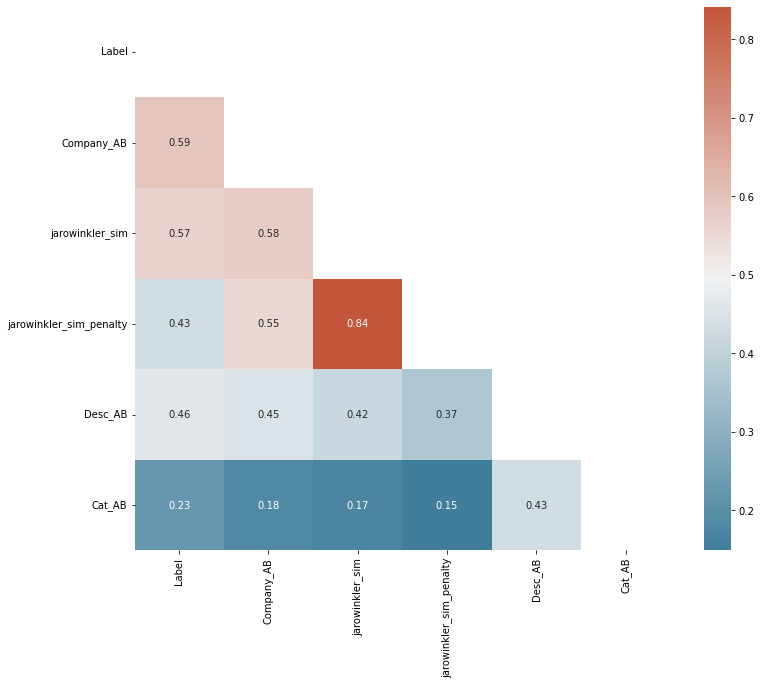

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#
#
df.columns = ['Company_A', 'Company_B','Label', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Desc_AB','Cat_AB']
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [261]:
df = df[['Company_A','Company_B','Company_AB','Desc_AB','jarowinkler_sim','jarowinkler_sim_penalty','Cat_AB','Label']]

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import cohen_kappa_score

In [192]:
# Assign values to the X and y variables:
X = df.iloc[:, :7].values
y = df.iloc[:, 7].values 

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=135)
X_train_new = [x[2:] for x in X_train]
X_test_new = [x[2:] for x in X_test]

In [194]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_new)
X_train_new = imp.transform(X_train_new)
X_test_new = imp.transform(X_test_new) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new) 

In [195]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train) 

KNeighborsClassifier()

In [196]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test_new)
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[96  8]
 [18 37]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       104
         1.0       0.82      0.67      0.74        55

    accuracy                           0.84       159
   macro avg       0.83      0.80      0.81       159
weighted avg       0.84      0.84      0.83       159

0.8364779874213837


In [197]:
cohen_kappa_score(y_test, y_predict)

0.6224657534246576

In [198]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
threshold = 0.8
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_new,y_train)
predicted_proba = trainedforest.predict_proba(X_test_new)
predictionforest = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))

print("Cohen kappa",cohen_kappa_score(y_test, predictionforest))

0.7987421383647799
Cohen kappa 0.4946364719904648


In [199]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_new,y_train)
predicted_proba = clf.predict_proba(X_test_new)
predictionLR = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionLR))


0.7735849056603774


In [200]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train_new,y_train)

predicted_SGD = clf.predict(X_test_new)
log_probab = clf.decision_function(X_test_new)

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predicted_SGD))

0.8301886792452831


In [42]:
import pickle

pickle.dump(clf, open('model/SGD.sav', 'wb'))

In [201]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.8427672955974843


In [44]:
#!pip install pydotplus

In [45]:
feature_cols = ['Company_AB','Desc_AB','jarowinkler_sim','jarowinkler_sim_penalty','Cat_AB']

In [47]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

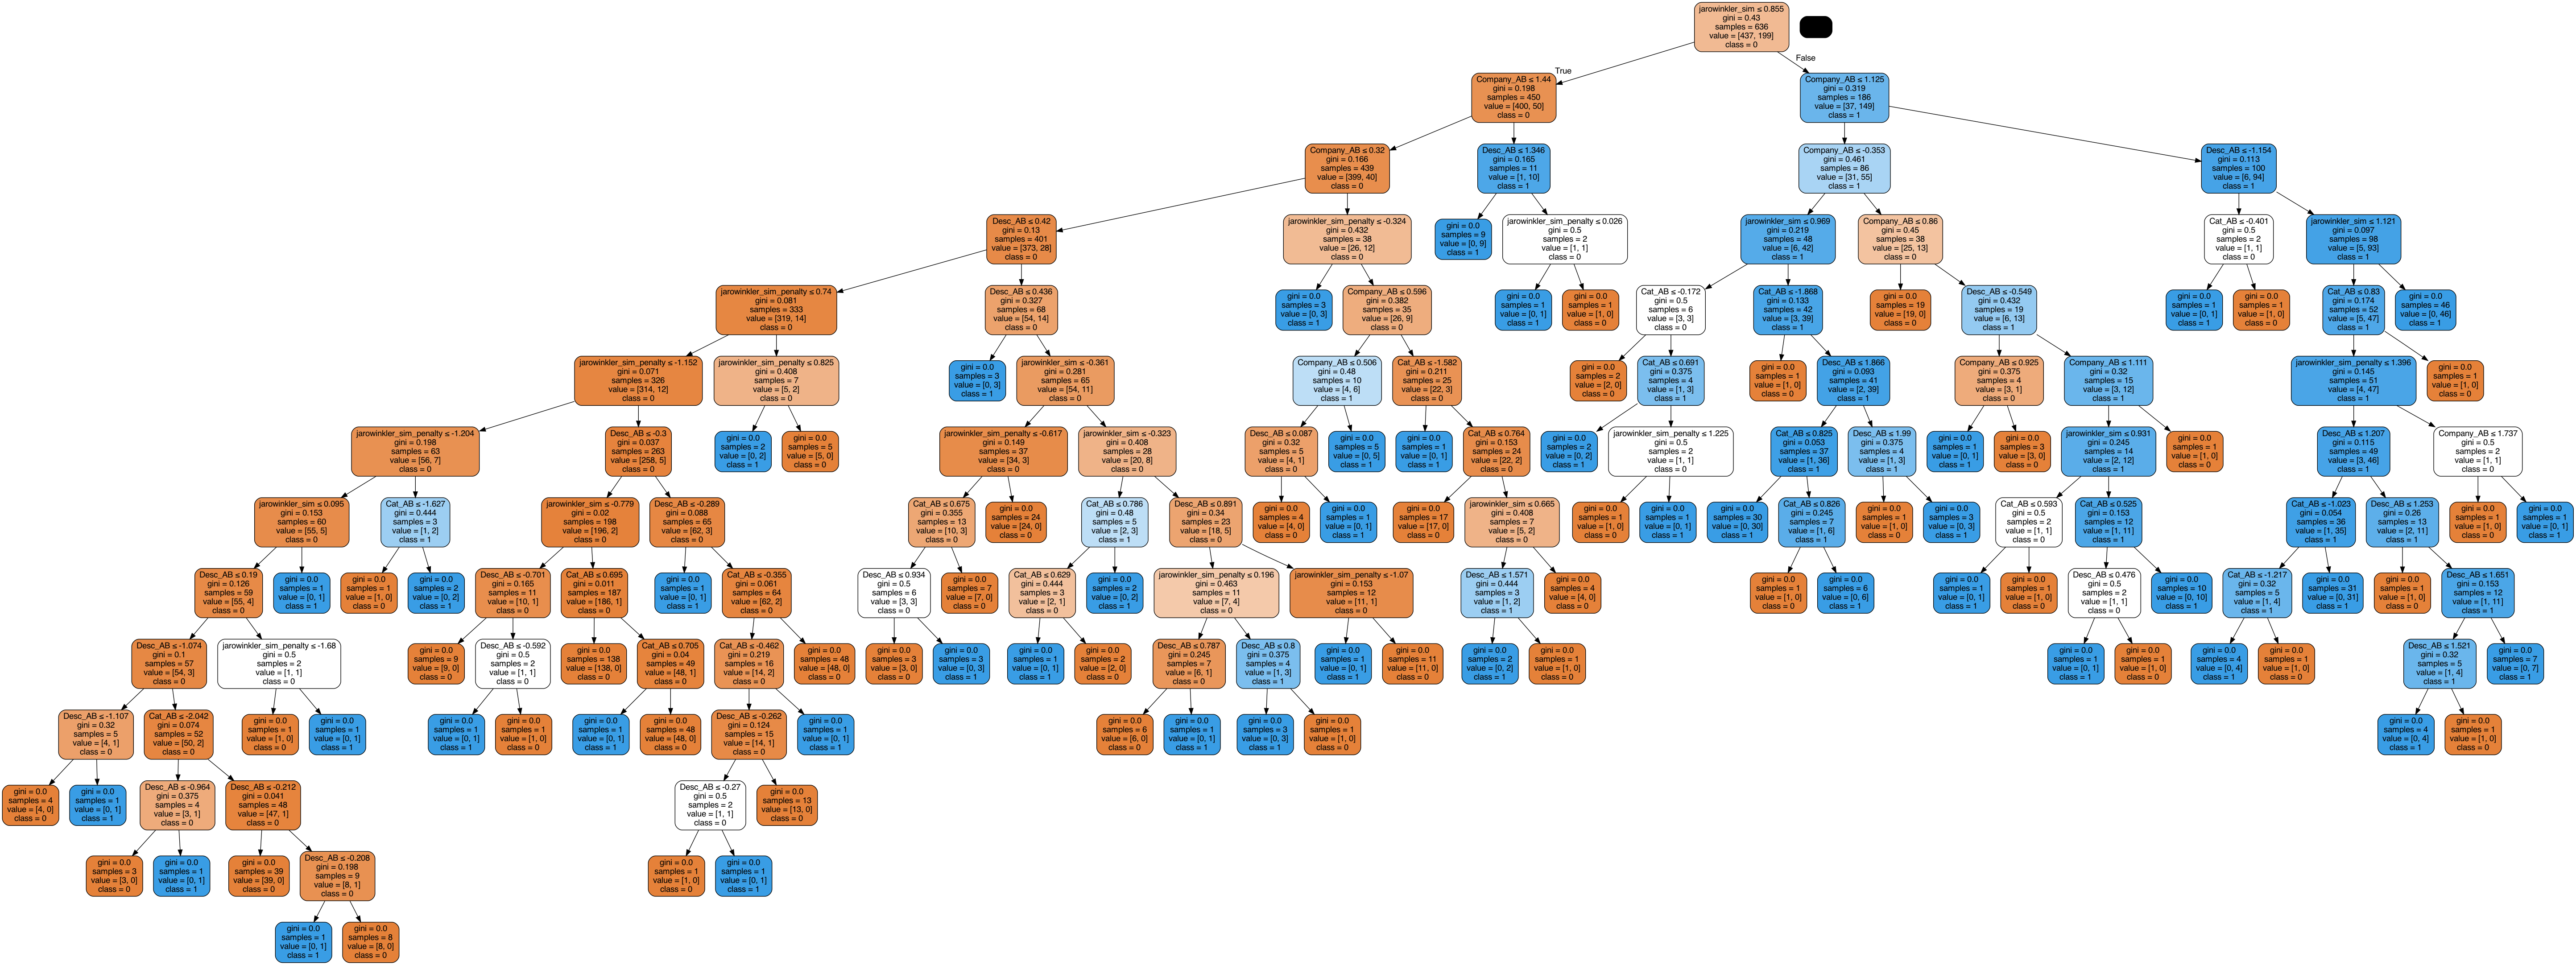

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DTree.png')
Image(graph.create_png())

In [202]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.8742138364779874


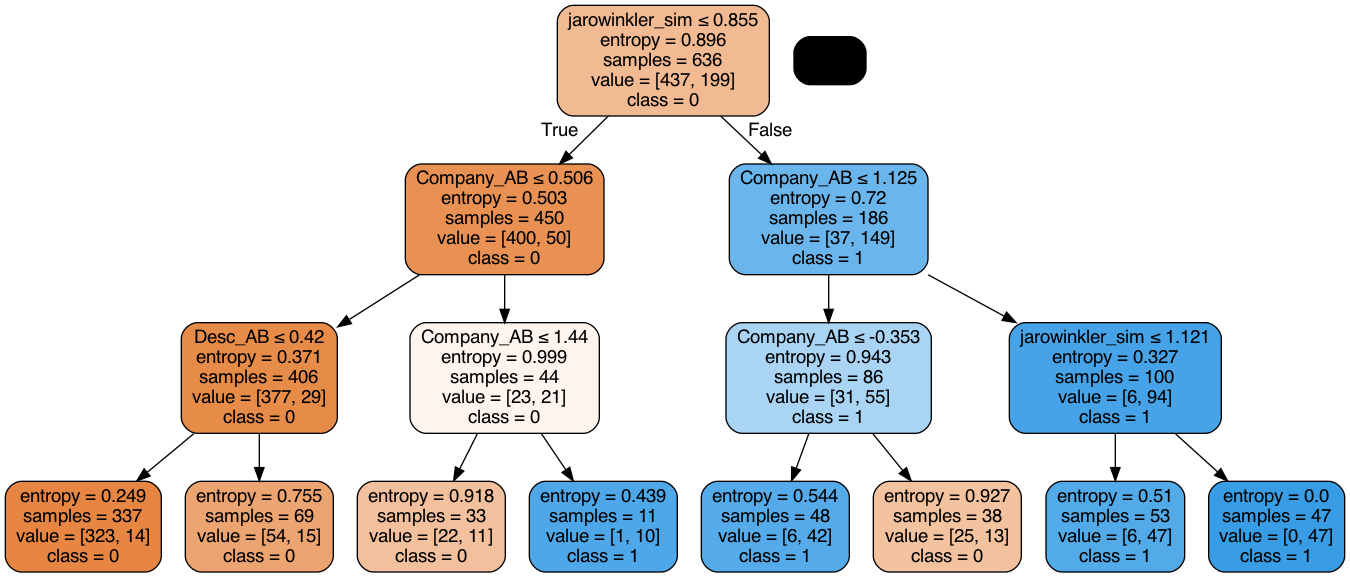

In [50]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DTree_optimized.png')
Image(graph.create_png())

In [282]:
pickle.dump(clf, open('model/DTree_opt.sav', 'wb'))

## Testing on Unlabelled Data

In [178]:
manufacturers = manufacturers[['manufacturer_name','material_descriptions']]

In [179]:
temp_df_1

manufacturer_name  \
0       A & F MACHINE PRODUCTS   
1             A & M INDUSTRIES   
2                  A & S FERSA   
3      A & S PIN PRODUCTS INC.   
4      A F CHAPMAN CORPORATION   
...                        ...   
23384                     ZURN   
23385    ZURN INDUSTRIES, INC.   
23386    ZVL-ZKL BEARINGS CORP   
23387               ZWEI, INC.   
23388             ZXZ  (CHINA)   

                                                 combine  
0      [0.0, 0.10638297872340426, 0.0, 0.0, 0.0, 0.01...  
1      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4      [0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                  ...  
23384  [0.0, 0.19047619047619047, 0.0, 0.0, 0.0, 0.01...  
23385  [0.0, 0.12244897959183673, 0.0, 0.0, 0.0, 0.09...  
23386  [0.0, 0.9105527638190954, 0.0, 0.0, 0.0, 0.0, ...  
23387  [0.0, 0.06976744186046512, 0.0, 0.0, 0.0, 0.0,...  
23388  [0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0,...  

[23389 rows x 2 columns]

In [180]:
merged_data= temp_df_1.merge(manufacturers,how = 'inner',left_on = 'manufacturer_name',right_on = 'manufacturer_name')

In [181]:
merged_data  = merged_data.sample(3000,random_state=3697)

In [182]:
merged_data

manufacturer_name  \
13687      MISC POWER INDUSTRIES   
6996               EZ AUTOMATION   
16796              PUROLATOR EFP   
14004  MOYNO INDUSTRIAL PRODUCTS   
22539                      WAUNA   
...                          ...   
22718       WESLEY INTERNATIONAL   
8323               GLADDEN SALES   
14036                        MSA   
19777                    STERLCO   
4931     CTG TECHNICAL SALES INC   

                                                 combine  \
13687  [0.0015414258188824663, 0.46705202312138727, 0...   
6996   [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   
16796  [0.0, 0.0, 0.0, 0.0, 0.0, 0.21428571428571427,...   
14004  [0.0, 0.004316546762589928, 0.0, 0.0, 0.0, 0.0...   
22539  [0.0, 0.8571428571428571, 0.0, 0.0, 0.0, 0.0, ...   
...                                                  ...   
22718  [0.0, 0.0625, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, ...   
8323   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14036  [0.0, 0.0, 0.0, 0.0, 0.0, 0.24050632911392406,...   
19777  [0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.16...   
4931   [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   

                                   material_descriptions  
13687  ["LSC-20SC125 1-1/4 S/COLLAR CLIMAX","64338530...  
6996   ["PANEL,CONTROL,EZ-T6C-FS,6 TFT COLOR SLIM BEZ...  
16796  ["SWP06.940501C25","20MESH 6.125''OD 2.6250'' ...  
14004  ["RD A1F6400 JOINT SEAL Q/R","4240719017 CON R...  
22539  ["ASSY MECH,GNRL987654321DOCTOR CAVITY ADJUSTM...  
...                                                  ...  
22718  ["AA-43 U-CUP RAM","EV-T030 SEAL WESLEY","AA-4...  
8323   ["NH-108-0 SCAFFOLD TAG INSERT HOLDER","JTG-90...  
14036  ["SENSOR, B-ULTIMA-21, 0-10 PPM NO2, 11BD5, P/...  
19777  ["VALVE,CONTROL508CONTROL,1IN FPT,125 PSI,100-...  
4931   ["COMPONENT,RESISTORAR50-2500SLIDEWIRE,2500OHM...  

[3000 rows x 3 columns]

In [183]:
merged_data.reset_index(inplace = True)

In [184]:
merged_data[['manufacturer_name']] = merged_data[['manufacturer_name']].astype(str)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(change_lower)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(clean_data)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(remover)

In [185]:
merged_data[['material_descriptions']] = merged_data[['material_descriptions']].astype(str)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(change_lower)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(clean_data)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(remover)

In [186]:
clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(merged_data['manufacturer_name'])
tfidf_a = clf_1.transform(merged_data['manufacturer_name'])

In [187]:
clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(merged_data['material_descriptions'])
tfidf_desc = clf_2.transform(merged_data['material_descriptions'])

In [188]:
unseen_data_full = pd.DataFrame()

In [189]:
unseen_data_full[['Company_A', 'Company_B']] = [[i,j] for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name'] ]

In [203]:
unseen_data_full["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]

In [204]:
avg_len = ((unseen_data_full["Company_A"].str.len()).median()+(unseen_data_full["Company_B"].str.len()).median())/2
unseen_data_full["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]


In [205]:
unseen_data_full["Company_AB"] = [j for sub in cosine_similarity(tfidf_a, tfidf_a) for j in sub]

In [206]:
unseen_data_full["Desc_AB"] = [j for sub in cosine_similarity(tfidf_desc, tfidf_desc) for j in sub]

In [207]:
from scipy.sparse import csr_matrix
#unseen_data_full["Cat_AB"] = [cosine_similarity([merged_data['combine'][i]], [merged_data['combine'][j]])[0][0].round(decimals=5) for i in range(1000) for j in range(1000)]
unseen_data_full["Cat_AB"] = [j for sub in cosine_similarity(csr_matrix(np.vstack(merged_data['combine'].values)), csr_matrix(np.vstack(merged_data['combine'].values))) for j in sub]

In [208]:
csr_matrix(np.vstack(merged_data['combine'].values))

<3000x33 sparse matrix of type '<class 'numpy.float64'>'
	with 11425 stored elements in Compressed Sparse Row format>

In [335]:
unseen_data_full

Company_A                  Company_B  \
0           hankison international     hankison international   
1           hankison international                  tamco inc   
2           hankison international                turbo valve   
3           hankison international            mr  roller inc    
4           hankison international                 label aire   
...                            ...                        ...   
8999995  sandelius instruments inc        palm labs adhesives   
8999996  sandelius instruments inc             service supply   
8999997  sandelius instruments inc                 kompindwel   
8999998  sandelius instruments inc                   lifeline   
8999999  sandelius instruments inc  sandelius instruments inc   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
0                   1.00                     1.00         1.0  1.000000   
1                   0.46                     0.46         0.0  0.022389   
2                   0.47                     0.47         0.0  0.213741   
3                   0.45                     0.45         0.0  0.001131   
4                   0.44                     0.44         0.0  0.039630   
...                  ...                      ...         ...       ...   
8999995             0.51                     0.51         0.0  0.000000   
8999996             0.55                     0.55         0.0  0.028311   
8999997             0.43                     0.43         0.0  0.000000   
8999998             0.39                     0.39         0.0  0.011801   
8999999             1.00                     1.00         1.0  1.000000   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
0        1.000000             1.0          1       1.000000         1   
1        0.000000             0.2          0       0.488571         0   
2        0.235346             0.0          0       0.468571         0   
3        0.000000             0.2          0       0.504286         0   
4        0.845082             0.2          0       0.472857         0   
...           ...             ...        ...            ...       ...   
8999995  0.000000             0.2          0       0.525714         0   
8999996  0.000000             0.2          0       0.687143         0   
8999997  0.000000             0.2          0       0.457143         0   
8999998  0.000000             0.2          0       0.428571         0   
8999999  1.000000             1.0          1       1.000000         1   

         Label_DT  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
8999995       1.0  
8999996       1.0  
8999997       1.0  
8999998       1.0  
8999999       1.0  

[9000000 rows x 12 columns]

In [210]:
X_unseen = unseen_data_full[['Company_AB','Desc_AB','jarowinkler_sim', 'jarowinkler_sim_penalty','Cat_AB']]

In [211]:
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [212]:
# KNN
predictive_labels_KNN = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN = (predictive_labels_KNN[:,1] >= threshold).astype('int')

In [213]:
unseen_data_full['probablity_KNN'] = predictive_labels_KNN[:,1]
unseen_data_full['Label_KNN']  = predictionKNN

In [214]:
#Random Forest
predictive_labels = trainedforest.predict_proba(X_unseen)
threshold = 0.8
predictionforest = (predictive_labels[:,1] >= threshold).astype('int')
unseen_data_full['probablity_RF'] = predictive_labels[:,1]
unseen_data_full['Label_RF']  = predictionforest

In [215]:
unseen_data_full[unseen_data_full['Label_RF'] == 1][unseen_data_full['Desc_AB']<1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3371168861.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_RF'] == 1][unseen_data_full['Desc_AB']<1]


Company_A                  Company_B  \
2708         misc power industries                     misc     
9003     moyno industrial products  moyno industrial products   
91050                    numatiinc               numatics inc   
111349   blackburn  thomas & betts   blackburn  thomas & bett   
131024                   char lynn                   charlynn   
...                            ...                        ...   
8971080          reassigned  use            reassigned  use     
8971308          reassigned  use            reassigned  use     
8971439          reassigned  use            reassigned  use     
8971567          reassigned  use            reassigned  use     
8972376          reassigned  use            reassigned  use     

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
2708                0.81                 0.724820    0.664426  0.118967   
9003                1.00                 1.000000    1.000000  1.000000   
91050               0.93                 0.605838    0.000000  0.507441   
111349              0.99                 0.990000    0.647020  0.499424   
131024              0.98                 0.456161    0.000000  0.608922   
...                  ...                      ...         ...       ...   
8971080             1.00                 1.000000    1.000000  0.000000   
8971308             1.00                 1.000000    1.000000  0.000000   
8971439             1.00                 1.000000    1.000000  0.000000   
8971567             1.00                 1.000000    1.000000  0.000000   
8972376             1.00                 1.000000    1.000000  0.000000   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  
2708     0.504552             0.8          1       0.827143         1  
9003     1.000000             1.0          1       1.000000         1  
91050    0.754949             0.8          1       0.831429         1  
111349   0.301511             0.8          1       0.962857         1  
131024   0.999926             1.0          1       0.930000         1  
...           ...             ...        ...            ...       ...  
8971080  0.000000             1.0          1       0.881429         1  
8971308  0.000000             1.0          1       0.881429         1  
8971439  0.000000             1.0          1       0.881429         1  
8971567  0.000000             1.0          1       0.881429         1  
8972376  0.000000             1.0          1       0.881429         1  

[581 rows x 11 columns]

In [216]:
SGD_model = pickle.load(open('model/SGD.sav', 'rb'))

In [217]:
predicted_SGD = SGD_model.predict(X_unseen)
unseen_data_full['Label_SGD']  = predicted_SGD

In [218]:
unseen_data_full[unseen_data_full['Label_SGD'] == 1][unseen_data_full['Desc_AB']<1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/4199150751.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_SGD'] == 1][unseen_data_full['Desc_AB']<1]


Company_A                Company_B  jarowinkler_sim  \
14         misc power industries        micron industries             0.84   
154        misc power industries        summer industries             0.73   
213        misc power industries          misc us bearing             0.81   
259        misc power industries  superior industries inc             0.79   
378        misc power industries       sunrise industries             0.80   
...                          ...                      ...              ...   
8988583            gladden sales             miller sales             0.68   
8988717            gladden sales       kirkland sales inc             0.74   
8990744            gladden sales     greenland sales ltd              0.81   
8995410                  sterlco                 steel co             0.91   
8998391  ctg technical sales inc  omi equipment sales inc             0.68   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  \
14                      0.840000    0.241471  0.011062  0.030247   
154                     0.730000    0.241471  0.010384  0.441444   
213                     0.810000    0.392992  0.268342  0.911943   
259                     0.790000    0.239058  0.077715  0.393970   
378                     0.800000    0.241471  0.016295  0.018444   
...                          ...         ...       ...       ...   
8988583                 0.556737    0.407231  0.000000  0.000000   
8988717                 0.740000    0.356277  0.000000  0.000000   
8990744                 0.810000    0.328678  0.000000  0.000000   
8995410                 0.334770    0.000000  0.007558  0.000000   
8998391                 0.680000    0.288859  0.102300  0.500000   

         probablity_KNN  Label_KNN  probablity_RF  Label_RF  Label_SGD  
14                  0.2          0       0.181429         0        1.0  
154                 0.2          0       0.214286         0        1.0  
213                 0.4          0       0.291429         0        1.0  
259                 0.2          0       0.044286         0        1.0  
378                 0.2          0       0.051429         0        1.0  
...                 ...        ...            ...       ...        ...  
8988583             0.0          0       0.241429         0        1.0  
8988717             0.4          0       0.335714         0        1.0  
8990744             0.4          0       0.181429         0        1.0  
8995410             0.0          0       0.424286         0        1.0  
8998391             0.4          0       0.055714         0        1.0  

[18202 rows x 12 columns]

In [219]:
DT_model = pickle.load(open('model/DTree_opt.sav', 'rb'))

In [220]:
predicted_DT = DT_model.predict(X_unseen)
unseen_data_full['Label_DT']  = predicted_DT

In [221]:
unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3243297329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]


Company_A                  Company_B  \
2708         misc power industries                     misc     
9003     moyno industrial products  moyno industrial products   
16887                  hayes&stolz                      hayes   
17832                  hayes&stolz                 haynesstel   
18217              armored textile                 armor coat   
...                            ...                        ...   
8971567          reassigned  use            reassigned  use     
8972376          reassigned  use            reassigned  use     
8975908             giw industries              wer industrie   
8994072                    sterlco                      stece   
8995410                    sterlco                   steel co   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
2708                0.81                 0.724820    0.664426  0.118967   
9003                1.00                 1.000000    1.000000  1.000000   
16887               0.89                 0.371007    0.675708  0.040702   
17832               0.89                 0.579781    0.000000  0.208462   
18217               0.83                 0.679547    0.000000  0.000000   
...                  ...                      ...         ...       ...   
8971567             1.00                 1.000000    1.000000  0.000000   
8972376             1.00                 1.000000    1.000000  0.000000   
8975908             0.85                 0.760613    0.000000  0.000000   
8994072             0.85                 0.189661    0.000000  0.008629   
8995410             0.91                 0.334770    0.000000  0.007558   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
2708     0.504552             0.8          1       0.827143         1   
9003     1.000000             1.0          1       1.000000         1   
16887    0.000000             0.6          0       0.692857         0   
17832    1.000000             0.8          1       0.674286         0   
18217    0.000000             0.0          0       0.177143         0   
...           ...             ...        ...            ...       ...   
8971567  0.000000             1.0          1       0.881429         1   
8972376  0.000000             1.0          1       0.881429         1   
8975908  0.000000             0.0          0       0.284286         0   
8994072  0.942809             0.4          0       0.534286         0   
8995410  0.000000             0.0          0       0.424286         0   

         Label_SGD  Label_DT  
2708           1.0       1.0  
9003           1.0       1.0  
16887          1.0       1.0  
17832          1.0       1.0  
18217          0.0       1.0  
...            ...       ...  
8971567        1.0       1.0  
8972376        1.0       1.0  
8975908        0.0       1.0  
8994072        0.0       1.0  
8995410        1.0       1.0  

[2774 rows x 13 columns]

In [314]:
output_df = unseen_data_full.drop(columns = ['Label_KNN','Label_RF'])

In [222]:
unseen_data_full.shape

(9000000, 13)

In [592]:
Pairs_DT  = unseen_data_full[unseen_data_full['Label_DT'] == 1].drop(columns = ['probablity_KNN','Label_KNN','probablity_RF','Label_RF','Label_SGD'])

In [598]:
Pairs_DT.to_excel("Output/Predicted_DT.xlsx")

In [602]:
Pairs_SGD  = unseen_data_full[unseen_data_full['Label_SGD'] == 1].drop(columns = ['probablity_KNN','Label_KNN','probablity_RF','Label_RF','Label_DT'])

In [603]:
Pairs_SGD.to_excel("Output/Predicted_SGD.xlsx")

In [623]:
Pairs_KNN  = unseen_data_full.drop(columns = ['Label_DT','probablity_RF','Label_RF','Label_DT','Label_SGD']).sort_values(by=['probablity_KNN'],ascending = False)

In [632]:
Pairs_KNN[:100000].to_excel("Output/Predicted_KNN.xlsx")

In [633]:
Pairs_RF  = unseen_data_full.drop(columns = ['Label_DT','probablity_KNN','Label_KNN','Label_DT','Label_SGD']).sort_values(by=['probablity_RF'],ascending = False)

In [636]:
Pairs_RF[:100000].to_excel("Output/Predicted_RF.xlsx")

In [133]:
unseen_data_full.to_csv("Output/FUll")

In [318]:
unseen_data_full.to_csv("Output/FUll_new.csv")

In [533]:
unseen_data_full = pd.read_csv("Output/FUll_new.csv",index_col=0)

In [165]:
unseen_data_full.shape

(9000000, 12)

## Bootstrapping 

In [86]:
new_data = unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1.0]
new_data = new_data.append(unseen_data_full[unseen_data_full['Label_DT'] == 0][unseen_data_full['Desc_AB']<1.0].sample(3000,random_state=3697))




/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3660444949.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1.0]
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3660444949.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.append(unseen_data_full[unseen_data_full['Label_DT'] == 0][unseen_data_full['Desc_AB']<1.0].sample(3000,random_state=3697))
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3660444949.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(unseen_data_full[unseen_data_full['Label_DT'] == 0][unseen_data_full['Desc_AB']<1.0].sample(3000,random_state=3697))


In [87]:
new_data

Company_A                  Company_B  \
2708         misc power industries                     misc     
9003     moyno industrial products  moyno industrial products   
16887                  hayes&stolz                      hayes   
17832                  hayes&stolz                 haynesstel   
18217              armored textile                 armor coat   
...                            ...                        ...   
8650879    unittool punch & die co  macmillin hyd engineering   
4511355                   machined            bassick casters   
2912551            kimberly parker    gems sensors & controls   
7334645           air systems intl                      novex   
7638459               bekaert corp               wsp sorbents   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
2708                0.81                 0.724820    0.664426  0.118967   
9003                1.00                 1.000000    1.000000  1.000000   
16887               0.89                 0.371007    0.675708  0.040702   
17832               0.89                 0.579781    0.000000  0.208462   
18217               0.83                 0.679547    0.000000  0.000000   
...                  ...                      ...         ...       ...   
8650879             0.55                 0.550000    0.000000  0.003498   
4511355             0.41                 0.302418    0.000000  0.045808   
2912551             0.44                 0.440000    0.000000  0.002173   
7334645             0.00                 0.000000    0.000000  0.000545   
7638459             0.48                 0.373824    0.000000  0.031465   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
2708     0.504552             0.8          1       0.824286         1   
9003     1.000000             1.0          1       1.000000         1   
16887    0.000000             0.6          0       0.734286         0   
17832    1.000000             0.8          1       0.704286         0   
18217    0.000000             0.0          0       0.171429         0   
...           ...             ...        ...            ...       ...   
8650879  0.000000             0.0          0       0.001429         0   
4511355  0.402269             0.0          0       0.008571         0   
2912551  0.153676             0.0          0       0.001429         0   
7334645  0.926894             0.2          0       0.238571         0   
7638459  0.000000             0.0          0       0.001429         0   

         Label_SGD  Label_DT  
2708           1.0       1.0  
9003           1.0       1.0  
16887          1.0       1.0  
17832          1.0       1.0  
18217          0.0       1.0  
...            ...       ...  
8650879        0.0       0.0  
4511355        0.0       0.0  
2912551        0.0       0.0  
7334645        0.0       0.0  
7638459        0.0       0.0  

[5774 rows x 13 columns]

In [88]:
new_data.reset_index(inplace = True,drop=True)

new_data.drop(columns = ['probablity_KNN', 'Label_KNN','probablity_RF', 'Label_RF','Label_SGD'],inplace = True)
new_data.rename(columns={"Label_DT": "Label"},inplace = True)

In [89]:
new_data['Label'].value_counts()

0.0    3000
1.0    2774
Name: Label, dtype: int64

In [96]:
df['Desc_AB']

0                   accuform signs accuform signs
1               action instruments inc action pak
2      aes engineered system albany engineered sy
3           allegro industries allegro industries
4                        allenbradl allen bradley
                          ...                    
790     schneider packaging equip yale & towne co
791                               yale yale hoist
792                              yale yale hoists
793                              yakasawa yaskawa
794            johnson yokogawa corporat yokogawa
Name: Desc_AB, Length: 795, dtype: object

In [111]:
new = df['Desc_AB'].append(merged_data['manufacturer_name'])
#df['Desc_AB'] = df['Desc_AB'] + merged_data['manufacturer_name']
clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(new.values)

tfidf_desc_a = clf_2.transform(res['mat_desc_A'])
tfidf_desc_b = clf_2.transform(res['mat_desc_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
df['Desc_AB'] = np.diag(cosine_similarity(tfidf_desc_a,tfidf_desc_b))


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/2290932025.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = df['Desc_AB'].append(merged_data['manufacturer_name'])


In [112]:
df

Company_A             Company_B  Company_AB   Desc_AB  \
0               accuform signs        accuform signs    1.000000  1.000000   
1       action instruments inc            action pak    0.532293  0.666632   
2        aes engineered system  albany engineered sy    0.314900  0.376978   
3           allegro industries    allegro industries    1.000000  1.000000   
4                   allenbradl         allen bradley    0.000000  0.939782   
..                         ...                   ...         ...       ...   
790  schneider packaging equip       yale & towne co    0.000000  0.090892   
791                       yale            yale hoist    0.691134  0.155019   
792                       yale           yale hoists    0.669288  0.625246   
793                   yakasawa               yaskawa    0.000000  0.901666   
794  johnson yokogawa corporat              yokogawa    0.615164  0.605436   

     jarowinkler_sim  jarowinkler_sim_penalty    Cat_AB  Label  
0               1.00                 1.000000  1.000000    1.0  
1               0.80                 0.800000  0.995249    0.0  
2               0.80                 0.800000  0.486190    0.0  
3               1.00                 1.000000  1.000000    1.0  
4               0.95                 0.870881  0.998839    1.0  
..               ...                      ...       ...    ...  
790             0.38                 0.380000  0.148183    0.0  
791             0.88                 0.401099  0.670613    1.0  
792             0.87                 0.446673  0.065759    1.0  
793             0.89                 0.456941  0.982860    1.0  
794             0.44                 0.440000  0.973056    0.0  

[795 rows x 8 columns]

In [114]:
new_data = new_data.append(df)

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/419255779.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(df)


In [115]:
new_data

Company_A                  Company_B  jarowinkler_sim  \
0        misc power industries                     misc               0.81   
1    moyno industrial products  moyno industrial products             1.00   
2                  hayes&stolz                      hayes             0.89   
3                  hayes&stolz                 haynesstel             0.89   
4              armored textile                 armor coat             0.83   
..                         ...                        ...              ...   
790  schneider packaging equip            yale & towne co             0.38   
791                       yale                 yale hoist             0.88   
792                       yale                yale hoists             0.87   
793                   yakasawa                    yaskawa             0.89   
794  johnson yokogawa corporat                   yokogawa             0.44   

     jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  Label  
0                   0.724820    0.664426  0.118967  0.504552    1.0  
1                   1.000000    1.000000  1.000000  1.000000    1.0  
2                   0.371007    0.675708  0.040702  0.000000    1.0  
3                   0.579781    0.000000  0.208462  1.000000    1.0  
4                   0.679547    0.000000  0.000000  0.000000    1.0  
..                       ...         ...       ...       ...    ...  
790                 0.380000    0.000000  0.090892  0.148183    0.0  
791                 0.401099    0.691134  0.155019  0.670613    1.0  
792                 0.446673    0.669288  0.625246  0.065759    1.0  
793                 0.456941    0.000000  0.901666  0.982860    1.0  
794                 0.440000    0.615164  0.605436  0.973056    0.0  

[6569 rows x 8 columns]

In [116]:
avg_len = ((new_data["Company_A"].str.len()).median()+(new_data["Company_B"].str.len()).median())/2

In [117]:
new_data["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i,j in zip(new_data["Company_A"],new_data["Company_B"])]

In [118]:
new_data['Company_A'].shape

(6569,)

In [119]:

new_data['Company_AB'] = new_data.apply(lambda x : x['Company_A'] + ' ' + x['Company_B'], axis=1)

clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(new_data['Company_AB'])


tfidf_a = clf_1.transform(new_data['Company_A'])
tfidf_b = clf_1.transform(new_data['Company_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_a[x],tfidf_b[x]) for x in range(len(tfidf_a)) ]
# res['Company_AB'] = row_similarities

new_data['Company_AB'] = np.diag(cosine_similarity(tfidf_a, tfidf_b))

In [120]:
tfidf_a.shape

(6569, 3493)

In [121]:
new_data['Label'].value_counts()

0.0    3541
1.0    3028
Name: Label, dtype: int64

In [122]:
new_data['Cat_AB'].value_counts()

0.000000    2434
1.000000     281
1.000000      54
1.000000      52
0.707107      47
            ... 
0.091991       1
0.788127       1
0.023211       1
0.000871       1
0.973056       1
Name: Cat_AB, Length: 2716, dtype: int64

## Feature Importance

In [123]:
new_data.columns 

Index(['Company_A', 'Company_B', 'jarowinkler_sim', 'jarowinkler_sim_penalty',
       'Company_AB', 'Desc_AB', 'Cat_AB', 'Label'],
      dtype='object')

<AxesSubplot:>

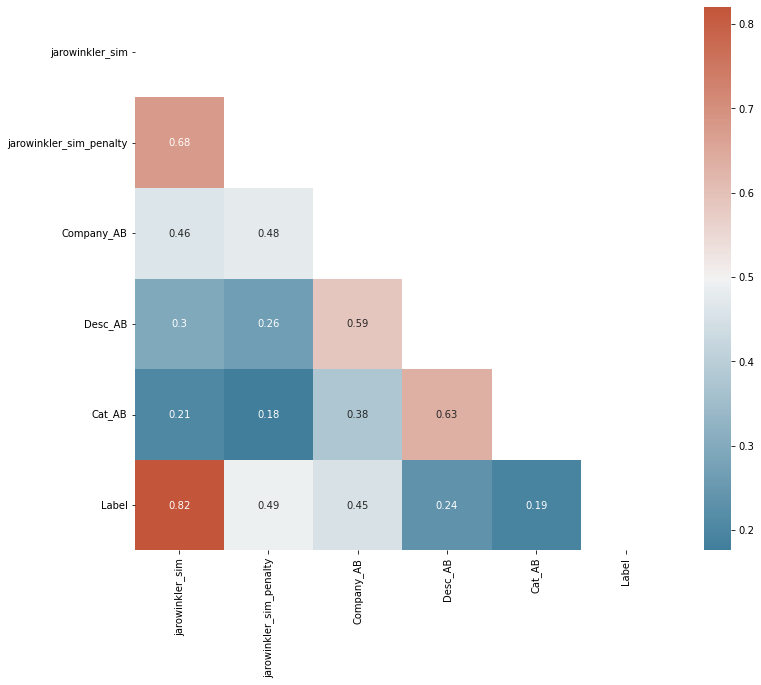

In [124]:

new_data.columns = ['Company_A', 'Company_B', 'jarowinkler_sim', 'jarowinkler_sim_penalty',
       'Company_AB', 'Desc_AB', 'Cat_AB', 'Label']
#
# Correlation between different variables
#
corr = new_data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Building the Model

In [125]:
# Assign values to the X and y variables:
X = new_data.iloc[:, :7].values
y = new_data.iloc[:, 7].values 

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=135)
X_train_new = [x[2:] for x in X_train]
X_test_new = [x[2:] for x in X_test]

In [127]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_new)
X_train_new = imp.transform(X_train_new)
X_test_new = imp.transform(X_test_new) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new) 

In [128]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train) 


KNeighborsClassifier()

In [129]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test_new)
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[686  17]
 [  9 602]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       703
         1.0       0.97      0.99      0.98       611

    accuracy                           0.98      1314
   macro avg       0.98      0.98      0.98      1314
weighted avg       0.98      0.98      0.98      1314

0.9802130898021308


In [130]:
cohen_kappa_score(y_test, y_predict)

0.9602652703762029

In [131]:
new_data.columns

Index(['Company_A', 'Company_B', 'jarowinkler_sim', 'jarowinkler_sim_penalty',
       'Company_AB', 'Desc_AB', 'Cat_AB', 'Label'],
      dtype='object')

In [132]:
# Check Missclassified Data - Random Forest 
df = pd.DataFrame()
df['Actual'] = y_test
df['Predicted'] = y_predict
df_1 = pd.DataFrame(X_test,columns = ['Company_A','Company_B', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Cat_AB','Desc_AB',])
df_1 = df_1.join(df)

In [133]:
df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3767610499.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]


Company_A                  Company_B Company_AB  \
35                          lift                    liberty       0.78   
75    hirschmann ; non-strategic     legris ; non-strategic       0.76   
184     toshiba america consumer  toshiba international cor       0.85   
200           cone machinery inc       hemco industries inc       0.68   
215                      tashiba                    toshiba       0.91   
377              phoenix contact     phoenix technology inc       0.85   
703                      insulco                  unisource       0.73   
790         signet scientific co  signode packaging systems       0.78   
874    wood group turbine contro       woodward governor co       0.84   
1050               gould modicon                modicon inc       0.63   
1065               ross controls                 rosshillco       0.82   
1081                       dwyer          dwyer instruments       0.86   
1101                    bussmann                 littelfuse        0.0   
1145                      grecon   greson technical sales &       0.78   
1228                parker fluid            parker hannifin       0.85   
1242                   cascacorp                   cascades       0.84   
1255                       eaton             eaton air flex       0.87   

     jarowinkler_sim jarowinkler_sim_penalty    Cat_AB   Desc_AB  Actual  \
35          0.199469                     0.0  0.020161  0.030565     0.0   
75              0.76                0.400488  0.054535       0.0     0.0   
184             0.85                0.346503   0.97832  0.982651     0.0   
200             0.68                0.060779   0.44145  0.785706     0.0   
215         0.386179                     0.0  0.789744  0.998439     0.0   
377             0.85                0.553982  0.439096  0.973835     0.0   
703         0.390741                     0.0  0.010678  0.578687     0.0   
790             0.78                     0.0  0.638569  0.665245     0.0   
874             0.84                     0.0  0.651227  0.857341     0.0   
1050        0.579628                0.676333  0.933772  0.997401     0.0   
1065        0.719725                     0.0  0.823383  0.699984     0.0   
1081        0.717028                0.785878  0.778579  0.966822     0.0   
1101             0.0                     0.0  0.951776  0.990433     0.0   
1145            0.78                     0.0  0.497874  0.957664     0.0   
1228            0.85                0.463988  0.828954  0.973203     0.0   
1242        0.494719                     0.0  0.406911  0.434748     0.0   
1255        0.601888                0.623085  0.147069  0.205057     0.0   

      Predicted  
35          1.0  
75          1.0  
184         1.0  
200         1.0  
215         1.0  
377         1.0  
703         1.0  
790         1.0  
874         1.0  
1050        1.0  
1065        1.0  
1081        1.0  
1101        1.0  
1145        1.0  
1228        1.0  
1242        1.0  
1255        1.0

In [134]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
threshold = 0.8
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_new,y_train)
predicted_proba = trainedforest.predict_proba(X_test_new)
predictionforest = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))

print("Cohen kappa",cohen_kappa_score(y_test, predictionforest))

0.9863013698630136
Cohen kappa 0.9724500707035645


In [135]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_new,y_train)
predicted_proba = clf.predict_proba(X_test_new)
predictionLR = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionLR))


0.971841704718417


In [136]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train_new,y_train)

predicted_SGD = clf.predict(X_test_new)
log_probab = clf.decision_function(X_test_new)

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predicted_SGD))

0.974124809741248


In [137]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.9832572298325722


In [138]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.984779299847793


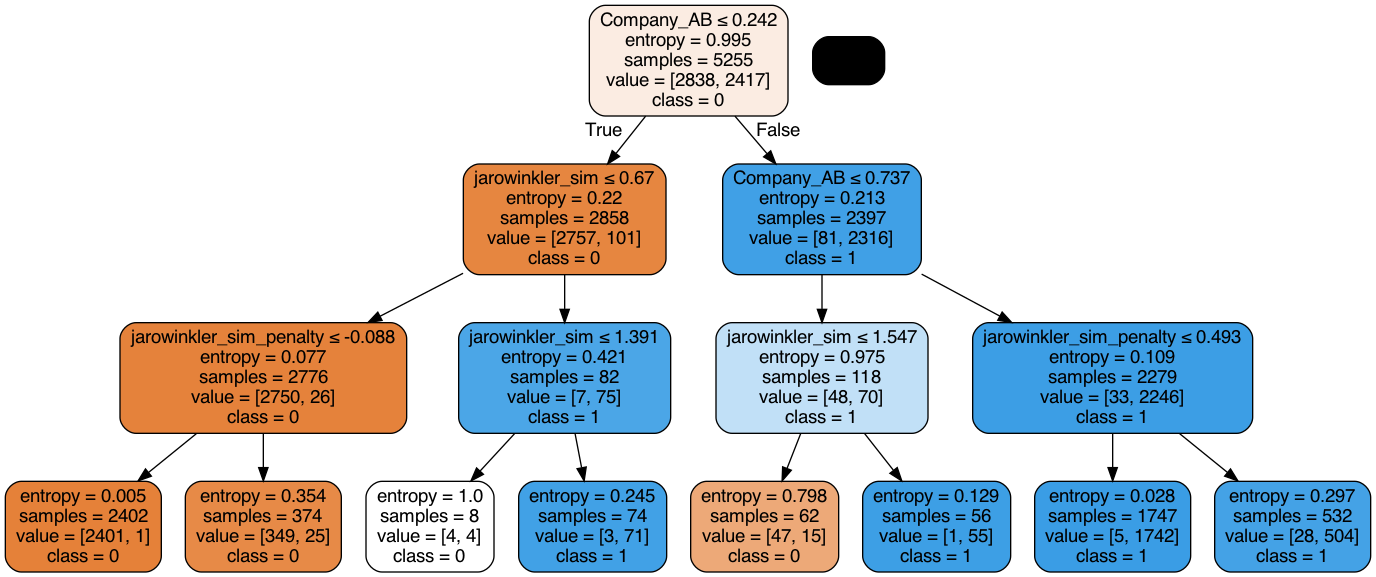

In [139]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DTree_optimized.png')
Image(graph.create_png())

## Testing on Unseen Data

In [140]:
merged_data= temp_df_1.merge(manufacturers,how = 'inner',left_on = 'manufacturer_name',right_on = 'manufacturer_name')

In [141]:
merged_data  = merged_data.sample(3000,random_state=11234)

In [142]:
merged_data 

manufacturer_name  \
8938      HANKISON INTERNATIONAL   
20323                  TAMCO INC   
21460                TURBO VALVE   
14024            MR. ROLLER INC.   
11628                 LABEL AIRE   
...                          ...   
15447        PALM LABS ADHESIVES   
18665             SERVICE SUPPLY   
11428                 KOMPINDWEL   
11990                   LIFELINE   
18197  SANDELIUS INSTRUMENTS INC   

                                                 combine  \
8938   [0.0, 0.0, 0.0, 0.0, 0.0, 0.6190476190476191, ...   
20323  [0.0, 0.006756756756756757, 0.0, 0.0, 0.0, 0.0...   
21460  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14024  [0.0, 0.016129032258064516, 0.0, 0.0, 0.0, 0.0...   
11628  [0.0, 0.0, 0.0, 0.0, 0.0, 0.8888888888888888, ...   
...                                                  ...   
15447  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
18665  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,...   
11428  [0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, ...   
11990  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166...   
18197  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   material_descriptions  
8938   ["THERMOCOUPLE,ELECT3153971HBP DRYER THERMOCOU...  
20323  ["3378-014 BACKOUT PUNCH","3377-014 BACKOUT PU...  
21460  ["M-35 EFDM35 REPAIR KIT","310 HEARING PROTECT...  
14024  ["BDEK01 SWIVEL CASTER 6\" MR ROLLER","LKC FOU...  
11628  ["MOTOR,ELECTRICAL9020717REWIND DRIVE, 9020717...  
...                                                  ...  
15447  ["05-130 TURBO FUSE .07 OZ VIT ORING","TURBO F...  
18665  ["C1900-0122  GREEN PEN","V-1000","BL-U-195","...  
11428  ["ADHESIVE,GNRLTM4501SPRAY TACK,SZ:15.75OZ","I...  
11990  ["[NP] SYS:O-O LIFELINE; TYPE: 50 FT; 3-WAY RE...  
18197              ["PPE,GNRLR1236SZ:25FT,APRON,RUBBER"]  

[3000 rows x 3 columns]

In [143]:
merged_data.reset_index(inplace = True,drop = True)

In [144]:
merged_data[['manufacturer_name']] = merged_data[['manufacturer_name']].astype(str)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(change_lower)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(clean_data)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(remover)

In [145]:
merged_data[['material_descriptions']] = merged_data[['material_descriptions']].astype(str)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(change_lower)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(clean_data)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(remover)

In [146]:
clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(merged_data['manufacturer_name'])
tfidf_a = clf_3.transform(merged_data['manufacturer_name'])

In [147]:
clf_4 = TfidfVectorizer(ngram_range=(1, 1))
clf_4.fit(merged_data['material_descriptions'])
tfidf_desc = clf_4.transform(merged_data['material_descriptions'])

In [148]:
unseen_data_full = pd.DataFrame()
unseen_data_full[['Company_A', 'Company_B']] = [[i,j] for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name'] ]



In [149]:
unseen_data_full

Company_A                  Company_B
0           hankison international     hankison international
1           hankison international                  tamco inc
2           hankison international                turbo valve
3           hankison international            mr  roller inc 
4           hankison international                 label aire
...                            ...                        ...
8999995  sandelius instruments inc        palm labs adhesives
8999996  sandelius instruments inc             service supply
8999997  sandelius instruments inc                 kompindwel
8999998  sandelius instruments inc                   lifeline
8999999  sandelius instruments inc  sandelius instruments inc

[9000000 rows x 2 columns]

In [150]:
avg_len = ((unseen_data_full["Company_A"].str.len()).median()+(unseen_data_full["Company_B"].str.len()).median())/2

In [151]:
unseen_data_full["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]
unseen_data_full["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]


In [152]:
unseen_data_full["Company_AB"] = [j for sub in cosine_similarity(tfidf_a, tfidf_a) for j in sub]
unseen_data_full["Desc_AB"] = [j for sub in cosine_similarity(tfidf_desc, tfidf_desc) for j in sub]

In [153]:
from scipy.sparse import csr_matrix
#unseen_data_full["Cat_AB"] = [cosine_similarity([merged_data['combine'][i]], [merged_data['combine'][j]])[0][0].round(decimals=5) for i in range(1000) for j in range(1000)]
unseen_data_full["Cat_AB"] = [j for sub in cosine_similarity(csr_matrix(np.vstack(merged_data['combine'].values)), csr_matrix(np.vstack(merged_data['combine'].values))) for j in sub]
csr_matrix(np.vstack(merged_data['combine'].values))

<3000x33 sparse matrix of type '<class 'numpy.float64'>'
	with 11250 stored elements in Compressed Sparse Row format>

In [154]:
X_unseen = unseen_data_full[['Company_AB','Desc_AB','jarowinkler_sim', 'jarowinkler_sim_penalty','Cat_AB']]

In [155]:
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [156]:
# KNN
predictive_labels_KNN = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN = (predictive_labels_KNN[:,1] >= threshold).astype('int')
unseen_data_full['probablity_KNN'] = predictive_labels_KNN[:,1]
unseen_data_full['Label_KNN']  = predictionKNN

In [157]:
#Random Forest
predictive_labels = trainedforest.predict_proba(X_unseen)
threshold = 0.8
predictionforest = (predictive_labels[:,1] >= threshold).astype('int')
unseen_data_full['probablity_RF'] = predictive_labels[:,1]
unseen_data_full['Label_RF']  = predictionforest

In [158]:
unseen_data_full[(unseen_data_full['Label_RF'] == 1)&(unseen_data_full['Company_AB']>0)]

Company_A                  Company_B  \
0           hankison international     hankison international   
402         hankison international  simonds international cor   
665         hankison international    litco international inc   
692         hankison international      koganei international   
1303        hankison international      ta chen international   
...                            ...                        ...   
8999885  sandelius instruments inc  scientific instrument inc   
8999891  sandelius instruments inc     innovative sensors inc   
8999906  sandelius instruments inc      lawton industries inc   
8999913  sandelius instruments inc        todd combustion inc   
8999999  sandelius instruments inc  sandelius instruments inc   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
0                   1.00                     1.00    1.000000  1.000000   
402                 0.72                     0.72    0.278247  0.052118   
665                 0.68                     0.68    0.334483  0.068744   
692                 0.82                     0.82    0.347283  0.251576   
1303                0.72                     0.72    0.269231  0.000000   
...                  ...                      ...         ...       ...   
8999885             0.76                     0.76    0.076411  0.000000   
8999891             0.73                     0.73    0.069951  0.000000   
8999906             0.75                     0.75    0.076092  0.000000   
8999913             0.58                     0.58    0.064152  0.000000   
8999999             1.00                     1.00    1.000000  1.000000   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  
0        1.000000             1.0          1       1.000000         1  
402      0.000000             1.0          1       0.902857         1  
665      0.000000             0.8          1       0.885714         1  
692      0.103249             0.8          1       0.905714         1  
1303     0.000000             1.0          1       0.905714         1  
...           ...             ...        ...            ...       ...  
8999885  0.000000             0.8          1       0.904286         1  
8999891  0.000000             0.8          1       0.908571         1  
8999906  0.013114             0.8          1       0.892857         1  
8999913  0.000000             0.8          1       0.825714         1  
8999999  1.000000             1.0          1       1.000000         1  

[124439 rows x 11 columns]

In [159]:
predicted_DT = clf.predict(X_unseen)
unseen_data_full['Label_DT']  = predicted_DT

In [160]:
unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3243297329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]


Company_A                          Company_B  \
9           hankison international               air king ventilation   
13          hankison international              precision twist drill   
14          hankison international  relaince electric ; non-strategic   
17          hankison international                  mapa professional   
19          hankison international                 marson corporation   
...                            ...                                ...   
8999985  sandelius instruments inc                    kunz industries   
8999990  sandelius instruments inc              niagara liquid meters   
8999991  sandelius instruments inc                 stretch associates   
8999993  sandelius instruments inc           ceramic & metal coatings   
8999994  sandelius instruments inc           goudsmit magnetics group   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
9                   0.70                     0.70         0.0  0.037059   
13                  0.59                     0.59         0.0  0.006491   
14                  0.57                     0.57         0.0  0.033592   
17                  0.61                     0.61         0.0  0.000000   
19                  0.58                     0.58         0.0  0.004716   
...                  ...                      ...         ...       ...   
8999985             0.64                     0.64         0.0  0.000000   
8999990             0.66                     0.66         0.0  0.000000   
8999991             0.61                     0.61         0.0  0.021263   
8999993             0.59                     0.59         0.0  0.000000   
8999994             0.64                     0.64         0.0  0.000000   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
9        0.843734             1.0          1       0.908571         1   
13       0.000000             0.8          1       0.798571         0   
14       0.851658             0.6          0       0.795714         0   
17       0.000000             0.8          1       0.697143         0   
19       0.000000             0.8          1       0.818571         1   
...           ...             ...        ...            ...       ...   
8999985  0.248069             0.6          0       0.860000         1   
8999990  0.000000             0.8          1       0.894286         1   
8999991  0.000000             0.8          1       0.690000         0   
8999993  0.000000             0.8          1       0.805714         1   
8999994  0.000000             0.8          1       0.877143         1   

         Label_DT  
9             1.0  
13            1.0  
14            1.0  
17            1.0  
19            1.0  
...           ...  
8999985       1.0  
8999990       1.0  
8999991       1.0  
8999993       1.0  
8999994       1.0  

[1563307 rows x 12 columns]

In [338]:
unseen_data_full.to_csv("Output/FUll_Bootstrapped.csv")

KeyboardInterrupt: 

In [162]:
merged_data[merged_data['manufacturer_name'] == 'hankison international']

manufacturer_name                                            combine  \
0  hankison international  [0.0, 0.0, 0.0, 0.0, 0.0, 0.6190476190476191, ...   

                               material_descriptions  
0  [thermocouple electhbp dryer thermocouple sst ...

In [163]:
merged_data[merged_data['manufacturer_name'] == 'air king ventilation']

manufacturer_name                                            combine  \
9  air king ventilation  [0.0, 0.0, 0.0, 0.0, 0.0, 0.8351648351648352, ...   

                               material_descriptions  
9  [ clip fan cm mount bracket \ floor fan g \ sp...

In [164]:
merged_data[merged_data['manufacturer_name'] == 'hammond power solutions']

manufacturer_name  \
26  hammond power solutions   

                                              combine  \
26  [0.0, 0.0, 0.0, 0.0, 0.0, 0.9387755102040817, ...   

                                material_descriptions  
26  [phaj transformer  v - v transformer control s...

## New DataSet

In [339]:
unseen_data_full = pd.read_csv("Output/FUll_new.csv",index_col=0)

In [340]:
new_data = unseen_data_full[(unseen_data_full['Label_DT'] == 1)&
                 (unseen_data_full['Label_KNN'] == 1)&
                 (unseen_data_full['Label_SGD'] == 1)&
                 (unseen_data_full['jarowinkler_sim']<1.0)]
new_data = new_data.append(unseen_data_full[(unseen_data_full['Label_DT'] == 0)&
                                (unseen_data_full['Label_KNN'] == 0)&
                                (unseen_data_full['Label_SGD'] == 0)][unseen_data_full['jarowinkler_sim']<1.0].sample(1000,random_state = 3967))



/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/279666958.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.append(unseen_data_full[(unseen_data_full['Label_DT'] == 0)&
/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/279666958.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(unseen_data_full[(unseen_data_full['Label_DT'] == 0)&


In [341]:
new_data

Company_A                  Company_B  \
2708         misc power industries                     misc     
33429               wilfley & sons                  wilfley &   
91050                    numatiinc               numatics inc   
111349   blackburn  thomas & betts   blackburn  thomas & bett   
131024                   char lynn                   charlynn   
...                            ...                        ...   
2604789          ra jones & co inc   edwards systems tech inc   
8679491                  madeleine         spedecut abrasives   
8151207                vaisala inc  central sprinkler corpora   
7511751                 rollvis sa                       usem   
4899438    barrett indus truck inc       sun machinery co inc   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
2708                0.81                 0.810000    0.664426  0.118967   
33429               0.93                 0.852547    0.707107  0.093822   
91050               0.93                 0.768706    0.000000  0.507441   
111349              0.99                 0.990000    0.647020  0.499424   
131024              0.98                 0.612142    0.000000  0.608922   
...                  ...                      ...         ...       ...   
2604789             0.64                 0.640000    0.062336  0.042283   
8679491             0.39                 0.390000    0.000000  0.000000   
8151207             0.54                 0.540000    0.000000  0.012677   
7511751             0.00                 0.000000    0.000000  0.000000   
4899438             0.66                 0.660000    0.052862  0.103184   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
2708     0.504552             0.8          1       0.830000         1   
33429    0.666667             0.8          1       0.832857         1   
91050    0.754949             0.8          1       0.950000         1   
111349   0.301511             0.8          1       0.950000         1   
131024   0.999926             1.0          1       0.924286         1   
...           ...             ...        ...            ...       ...   
2604789  0.000000             0.0          0       0.007143         0   
8679491  0.000000             0.0          0       0.005714         0   
8151207  0.000000             0.0          0       0.000000         0   
7511751  0.000000             0.2          0       0.152857         0   
4899438  0.322749             0.0          0       0.028571         0   

         Label_SGD  Label_DT  
2708           1.0       1.0  
33429          1.0       1.0  
91050          1.0       1.0  
111349         1.0       1.0  
131024         1.0       1.0  
...            ...       ...  
2604789        0.0       0.0  
8679491        0.0       0.0  
8151207        0.0       0.0  
7511751        0.0       0.0  
4899438        0.0       0.0  

[1438 rows x 13 columns]

In [252]:
new_data.reset_index(inplace = True,drop=True)

new_data.drop(columns = ['probablity_KNN', 'Label_KNN','probablity_RF', 'Label_RF','Label_SGD'],inplace = True)
new_data.rename(columns={"Label_DT": "Label"},inplace = True)

In [253]:
new_data['Label'].value_counts()

0.0    1000
1.0     774
Name: Label, dtype: int64

In [258]:
df['Desc_AB']

0      {tamptp small lockout tags pack  - style stmc ...
1      {indicator gnrl v- display ixys mcc converter ...
2      {nozzle gnrlvf s\v\ fan  degree valve  ball  v...
3      {- dlx work tent hi-vis grn wht lbl labels  pk...
4      {switch rotary ep-lsm selector switch- a-b lig...
                             ...                        
509    {element filter haair - pressure regulator vlv...
510    {null null belt gnrl  belt pulley mmxmm  ball ...
511    {bushing flange  mm x mm x mm  black polymer b...
512    {module electrical -eiogp-- v  ac module elect...
513    {spring compressionw--spring  gnrl  npt air fi...
Name: Desc_AB, Length: 514, dtype: object

In [262]:
df['Desc_AB'] = res.apply(lambda x : x['mat_desc_A'] + ' ' + x['mat_desc_B'], axis=1)

new = df['Desc_AB'].append(merged_data['material_descriptions'])
#df['Desc_AB'] = df['Desc_AB'] + merged_data['manufacturer_name']
clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(new.values)

tfidf_desc_a = clf_2.transform(res['mat_desc_A'])
tfidf_desc_b = clf_2.transform(res['mat_desc_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
df['Desc_AB'] = np.diag(cosine_similarity(tfidf_desc_a,tfidf_desc_b))


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/1128312244.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = df['Desc_AB'].append(merged_data['material_descriptions'])


In [263]:
new_data = new_data.append(df)

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/419255779.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(df)


In [264]:
avg_len = ((new_data["Company_A"].str.len()).median()+(new_data["Company_B"].str.len()).median())/2

In [265]:
new_data["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i,j in zip(new_data["Company_A"],new_data["Company_B"])]

In [266]:

new_data['Company_AB'] = new_data.apply(lambda x : x['Company_A'] + ' ' + x['Company_B'], axis=1)

clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(new_data['Company_AB'])


tfidf_a = clf_1.transform(new_data['Company_A'])
tfidf_b = clf_1.transform(new_data['Company_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_a[x],tfidf_b[x]) for x in range(len(tfidf_a)) ]
# res['Company_AB'] = row_similarities

new_data['Company_AB'] = np.diag(cosine_similarity(tfidf_a, tfidf_b))

In [267]:
new_data['Label'].value_counts()

0.0    1541
1.0    1028
Name: Label, dtype: int64

<AxesSubplot:>

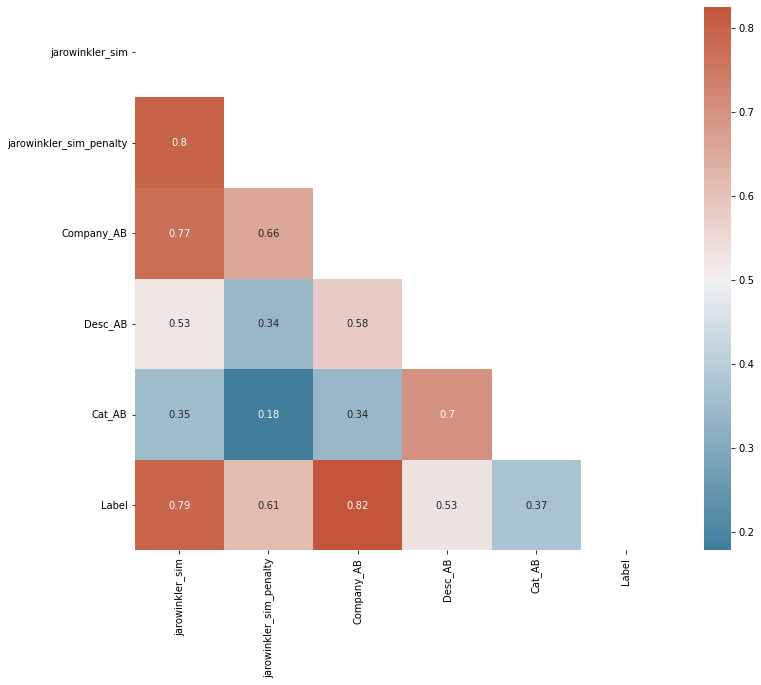

In [269]:

new_data.columns = ['Company_A', 'Company_B', 'jarowinkler_sim', 'jarowinkler_sim_penalty',
       'Company_AB', 'Desc_AB', 'Cat_AB', 'Label']
#
# Correlation between different variables
#
corr = new_data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [270]:
# Assign values to the X and y variables:
X = new_data.iloc[:, :7].values
y = new_data.iloc[:, 7].values 

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=135)
X_train_new = [x[2:] for x in X_train]
X_test_new = [x[2:] for x in X_test]

In [272]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_new)
X_train_new = imp.transform(X_train_new)
X_test_new = imp.transform(X_test_new) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new) 

In [273]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train) 


KNeighborsClassifier()

In [274]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test_new)
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[293  10]
 [ 14 197]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       303
         1.0       0.95      0.93      0.94       211

    accuracy                           0.95       514
   macro avg       0.95      0.95      0.95       514
weighted avg       0.95      0.95      0.95       514

0.953307392996109


In [275]:
cohen_kappa_score(y_test, y_predict)

0.9032455411065272

In [276]:
# Check Missclassified Data - Random Forest 
df = pd.DataFrame()
df['Actual'] = y_test
df['Predicted'] = y_predict
df_1 = pd.DataFrame(X_test,columns = ['Company_A','Company_B', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Cat_AB','Desc_AB',])
df_1 = df_1.join(df)

In [328]:
df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3767610499.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]


Company_A                  Company_B Company_AB  \
8                  marsh gauge             marsh mcbirney       0.83   
24          federal mogul corp                 federalsig       0.85   
54        signet scientific co  signode packaging systems       0.78   
134                     fisher         fisher key control       0.87   
170     brown paper converting   paper converting machine       0.69   
218                       mack              mack grapples       0.86   
235  johnson yokogawa corporat                   yokogawa       0.44   
262                         ro         ross hill controls       0.76   
299              gould modicon                modicon inc       0.63   
387        morse chain company           morse sealmaster       0.81   

    jarowinkler_sim jarowinkler_sim_penalty    Cat_AB   Desc_AB  Actual  \
8          0.707279                0.440713  0.211861  0.688428     0.0   
24         0.820179                     0.0  0.192203   0.57735     0.0   
54             0.78                     0.0  0.277786  0.665245     0.0   
134        0.706385                0.590286  0.384367  0.614659     0.0   
170            0.69                 0.63067  0.292924  0.911519     0.0   
218        0.424559                0.651297  0.209109  0.338723     0.0   
235            0.44                0.619104  0.425564  0.973056     0.0   
262        0.484597                     0.0  0.446706  0.987777     0.0   
299         0.51152                0.665259  0.875738  0.997401     0.0   
387            0.81                0.475307  0.703442  0.999034     0.0   

     Predicted  
8          1.0  
24         1.0  
54         1.0  
134        1.0  
170        1.0  
218        1.0  
235        1.0  
262        1.0  
299        1.0  
387        1.0

In [278]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
threshold = 0.8
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_new,y_train)
predicted_proba = trainedforest.predict_proba(X_test_new)
predictionforest = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))

print("Cohen kappa",cohen_kappa_score(y_test, predictionforest))

0.9513618677042801
Cohen kappa 0.89825972668683


In [279]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_new,y_train)
predicted_proba = clf.predict_proba(X_test_new)
predictionLR = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionLR))


0.914396887159533


In [280]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train_new,y_train)

predicted_SGD = clf.predict(X_test_new)
log_probab = clf.decision_function(X_test_new)

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predicted_SGD))

0.9396887159533074


In [281]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.9552529182879378


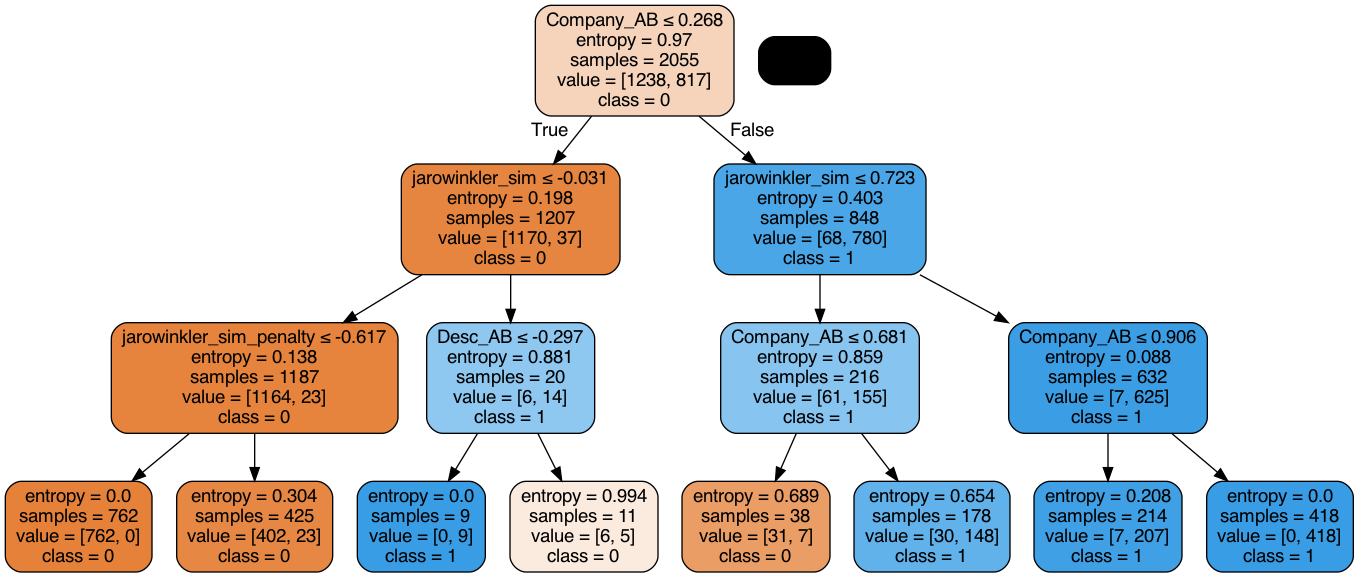

In [282]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DTree_optimized.png')
Image(graph.create_png())

## Testing on Unseen Data

In [283]:
merged_data= temp_df_1.merge(manufacturers,how = 'inner',left_on = 'manufacturer_name',right_on = 'manufacturer_name')

In [284]:
merged_data  = merged_data.sample(3000,random_state=11234)

In [285]:
merged_data 

manufacturer_name  \
8938      HANKISON INTERNATIONAL   
20323                  TAMCO INC   
21460                TURBO VALVE   
14024            MR. ROLLER INC.   
11628                 LABEL AIRE   
...                          ...   
15447        PALM LABS ADHESIVES   
18665             SERVICE SUPPLY   
11428                 KOMPINDWEL   
11990                   LIFELINE   
18197  SANDELIUS INSTRUMENTS INC   

                                                 combine  \
8938   [0.0, 0.0, 0.0, 0.0, 0.0, 0.6190476190476191, ...   
20323  [0.0, 0.006756756756756757, 0.0, 0.0, 0.0, 0.0...   
21460  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14024  [0.0, 0.016129032258064516, 0.0, 0.0, 0.0, 0.0...   
11628  [0.0, 0.0, 0.0, 0.0, 0.0, 0.8888888888888888, ...   
...                                                  ...   
15447  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
18665  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,...   
11428  [0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, ...   
11990  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166...   
18197  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   material_descriptions  
8938   ["THERMOCOUPLE,ELECT3153971HBP DRYER THERMOCOU...  
20323  ["3378-014 BACKOUT PUNCH","3377-014 BACKOUT PU...  
21460  ["M-35 EFDM35 REPAIR KIT","310 HEARING PROTECT...  
14024  ["BDEK01 SWIVEL CASTER 6\" MR ROLLER","LKC FOU...  
11628  ["MOTOR,ELECTRICAL9020717REWIND DRIVE, 9020717...  
...                                                  ...  
15447  ["05-130 TURBO FUSE .07 OZ VIT ORING","TURBO F...  
18665  ["C1900-0122  GREEN PEN","V-1000","BL-U-195","...  
11428  ["ADHESIVE,GNRLTM4501SPRAY TACK,SZ:15.75OZ","I...  
11990  ["[NP] SYS:O-O LIFELINE; TYPE: 50 FT; 3-WAY RE...  
18197              ["PPE,GNRLR1236SZ:25FT,APRON,RUBBER"]  

[3000 rows x 3 columns]

In [286]:
merged_data.reset_index(inplace = True,drop = True)

In [287]:
merged_data[['manufacturer_name']] = merged_data[['manufacturer_name']].astype(str)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(change_lower)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(clean_data)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(remover)

In [288]:
merged_data[['material_descriptions']] = merged_data[['material_descriptions']].astype(str)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(change_lower)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(clean_data)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(remover)

In [289]:
clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(merged_data['manufacturer_name'])
tfidf_a = clf_3.transform(merged_data['manufacturer_name'])

In [290]:
clf_4 = TfidfVectorizer(ngram_range=(1, 1))
clf_4.fit(merged_data['material_descriptions'])
tfidf_desc = clf_4.transform(merged_data['material_descriptions'])

In [291]:
unseen_data_full = pd.DataFrame()
unseen_data_full[['Company_A', 'Company_B']] = [[i,j] for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name'] ]



In [292]:
avg_len = ((unseen_data_full["Company_A"].str.len()).median()+(unseen_data_full["Company_B"].str.len()).median())/2

In [293]:
unseen_data_full["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]
unseen_data_full["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]


In [294]:
unseen_data_full["Company_AB"] = [j for sub in cosine_similarity(tfidf_a, tfidf_a) for j in sub]
unseen_data_full["Desc_AB"] = [j for sub in cosine_similarity(tfidf_desc, tfidf_desc) for j in sub]

In [295]:
from scipy.sparse import csr_matrix
#unseen_data_full["Cat_AB"] = [cosine_similarity([merged_data['combine'][i]], [merged_data['combine'][j]])[0][0].round(decimals=5) for i in range(1000) for j in range(1000)]
unseen_data_full["Cat_AB"] = [j for sub in cosine_similarity(csr_matrix(np.vstack(merged_data['combine'].values)), csr_matrix(np.vstack(merged_data['combine'].values))) for j in sub]
csr_matrix(np.vstack(merged_data['combine'].values))

<3000x33 sparse matrix of type '<class 'numpy.float64'>'
	with 11250 stored elements in Compressed Sparse Row format>

In [296]:
X_unseen = unseen_data_full[['Company_AB','Desc_AB','jarowinkler_sim', 'jarowinkler_sim_penalty','Cat_AB']]

In [297]:
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [298]:
# KNN
predictive_labels_KNN = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN = (predictive_labels_KNN[:,1] >= threshold).astype('int')
unseen_data_full['probablity_KNN'] = predictive_labels_KNN[:,1]
unseen_data_full['Label_KNN']  = predictionKNN

In [299]:
#Random Forest
predictive_labels = trainedforest.predict_proba(X_unseen)
threshold = 0.8
predictionforest = (predictive_labels[:,1] >= threshold).astype('int')
unseen_data_full['probablity_RF'] = predictive_labels[:,1]
unseen_data_full['Label_RF']  = predictionforest

In [300]:
unseen_data_full[(unseen_data_full['Label_RF'] == 1)&(unseen_data_full['Company_AB']>0)]

Company_A                                Company_B  \
0           hankison international                   hankison international   
402         hankison international                simonds international cor   
665         hankison international                  litco international inc   
692         hankison international                    koganei international   
1213        hankison international  argo international corp ; non-strategic   
...                            ...                                      ...   
8999891  sandelius instruments inc                   innovative sensors inc   
8999906  sandelius instruments inc                    lawton industries inc   
8999965  sandelius instruments inc                    microwave sensors inc   
8999966  sandelius instruments inc                  adsens technology  inc    
8999999  sandelius instruments inc                sandelius instruments inc   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
0                   1.00                     1.00    1.000000  1.000000   
402                 0.72                     0.72    0.278247  0.052118   
665                 0.68                     0.68    0.334483  0.068744   
692                 0.82                     0.82    0.347283  0.251576   
1213                0.61                     0.61    0.279224  0.031708   
...                  ...                      ...         ...       ...   
8999891             0.73                     0.73    0.069951  0.000000   
8999906             0.75                     0.75    0.076092  0.000000   
8999965             0.62                     0.62    0.066026  0.000000   
8999966             0.62                     0.62    0.070619  0.000000   
8999999             1.00                     1.00    1.000000  1.000000   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  
0        1.000000             1.0          1       1.000000         1  
402      0.000000             0.2          0       0.878571         1  
665      0.000000             0.2          0       0.901429         1  
692      0.103249             1.0          1       0.844286         1  
1213     0.000000             0.2          0       0.810000         1  
...           ...             ...        ...            ...       ...  
8999891  0.000000             0.2          0       0.862857         1  
8999906  0.013114             0.2          0       0.847143         1  
8999965  0.000000             0.2          0       0.892857         1  
8999966  0.000000             0.2          0       0.892857         1  
8999999  1.000000             1.0          1       1.000000         1  

[130907 rows x 11 columns]

In [301]:
predicted_DT = clf.predict(X_unseen)
unseen_data_full['Label_DT']  = predicted_DT

In [302]:
unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_82042/3243297329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_DT'] == 1][unseen_data_full['Desc_AB']<1]


Company_A                 Company_B  jarowinkler_sim  \
1           hankison international                 tamco inc             0.46   
2           hankison international               turbo valve             0.47   
3           hankison international           mr  roller inc              0.45   
4           hankison international                label aire             0.44   
5           hankison international     arctec alloys limited             0.55   
...                            ...                       ...              ...   
8999994  sandelius instruments inc  goudsmit magnetics group             0.64   
8999995  sandelius instruments inc       palm labs adhesives             0.51   
8999996  sandelius instruments inc            service supply             0.55   
8999997  sandelius instruments inc                kompindwel             0.43   
8999998  sandelius instruments inc                  lifeline             0.39   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  \
1                           0.46         0.0  0.022389  0.000000   
2                           0.47         0.0  0.213741  0.235346   
3                           0.45         0.0  0.001131  0.000000   
4                           0.44         0.0  0.039630  0.845082   
5                           0.55         0.0  0.004773  0.094027   
...                          ...         ...       ...       ...   
8999994                     0.64         0.0  0.000000  0.000000   
8999995                     0.51         0.0  0.000000  0.000000   
8999996                     0.55         0.0  0.028311  0.000000   
8999997                     0.43         0.0  0.000000  0.000000   
8999998                     0.39         0.0  0.011801  0.000000   

         probablity_KNN  Label_KNN  probablity_RF  Label_RF  Label_DT  
1                   0.2          0       0.488571         0       1.0  
2                   0.0          0       0.468571         0       1.0  
3                   0.2          0       0.504286         0       1.0  
4                   0.2          0       0.472857         0       1.0  
5                   0.2          0       0.685714         0       1.0  
...                 ...        ...            ...       ...       ...  
8999994             0.2          0       0.901429         1       1.0  
8999995             0.2          0       0.525714         0       1.0  
8999996             0.2          0       0.687143         0       1.0  
8999997             0.2          0       0.457143         0       1.0  
8999998             0.2          0       0.428571         0       1.0  

[8217319 rows x 12 columns]

In [308]:
unseen_data_full.to_csv("Output/FUll_Bootstrapped_New.csv")

In [309]:
unseen_data_full[(unseen_data_full['Label_DT'] == 1)&
                 (unseen_data_full['Label_KNN'] == 1)&
                 (unseen_data_full['Label_RF'] == 1)&
                 (unseen_data_full['Desc_AB']<1) & (unseen_data_full['Cat_AB']>0)]

Company_A                  Company_B  \
9           hankison international       air king ventilation   
26          hankison international    hammond power solutions   
338         hankison international                    hanchen   
362         hankison international  haydon switch & instrumen   
614         hankison international    wilkerson instrument co   
...                            ...                        ...   
8997540  sandelius instruments inc   safety equipment company   
8998445  sandelius instruments inc    miller safety equipment   
8998671  sandelius instruments inc         steiner industries   
8999019  sandelius instruments inc        tians international   
8999314  sandelius instruments inc    great lakes testing inc   

         jarowinkler_sim  jarowinkler_sim_penalty  Company_AB   Desc_AB  \
9                   0.70                 0.700000    0.000000  0.037059   
26                  0.67                 0.670000    0.000000  0.062350   
338                 0.71                 0.685935    0.000000  0.035558   
362                 0.69                 0.690000    0.000000  0.049007   
614                 0.63                 0.630000    0.000000  0.136266   
...                  ...                      ...         ...       ...   
8997540             0.66                 0.660000    0.000000  0.227043   
8998445             0.60                 0.600000    0.000000  0.309672   
8998671             0.74                 0.740000    0.000000  0.020336   
8999019             0.69                 0.690000    0.000000  0.000000   
8999314             0.62                 0.620000    0.054761  0.093860   

           Cat_AB  probablity_KNN  Label_KNN  probablity_RF  Label_RF  \
9        0.843734             0.8          1       0.932857         1   
26       0.851156             0.8          1       0.902857         1   
338      0.851658             0.8          1       0.915714         1   
362      0.851658             0.8          1       0.930000         1   
614      0.932675             0.8          1       0.938571         1   
...           ...             ...        ...            ...       ...   
8997540  0.970143             1.0          1       0.905714         1   
8998445  0.991228             1.0          1       0.850000         1   
8998671  0.691745             0.8          1       0.847143         1   
8999019  0.999261             0.8          1       0.801429         1   
8999314  0.894427             1.0          1       0.944286         1   

         Label_DT  
9             1.0  
26            1.0  
338           1.0  
362           1.0  
614           1.0  
...           ...  
8997540       1.0  
8998445       1.0  
8998671       1.0  
8999019       1.0  
8999314       1.0  

[35412 rows x 12 columns]

In [306]:
merged_data[merged_data['manufacturer_name'] == 'hankison international']

manufacturer_name                                            combine  \
0  hankison international  [0.0, 0.0, 0.0, 0.0, 0.0, 0.6190476190476191, ...   

                               material_descriptions  
0  [thermocouple electhbp dryer thermocouple sst ...

In [ ]:
merged_data[merged_data['manufacturer_name'] == 'air king ventilation']